# Monte Carlo: Sampling

## Direct sampling

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# direct-pi

print('Direct sampling')
print('{:3s} {:5s} {:10s}'.format('Run', 'N_hit', 'Estimate of π 估計值'))

for run in range(5):
    N_hit = 0
    N = 4000
    for i in range(N):
        x = np.random.random()*2-1
        y = np.random.random()*2-1
        if x*x + y*y < 1 :
            N_hit = N_hit + 1
    print("{:^3d} {:^5d} {:^10.3f}".format(run+1, N_hit, N_hit/(N/4)))
#     print(run+1, N_hit, N_hit/(N/4))

Direct sampling
Run N_hit Estimate of π 估計值
 1  3161    3.161   
 2  3121    3.121   
 3  3130    3.130   
 4  3141    3.141   
 5  3147    3.147   


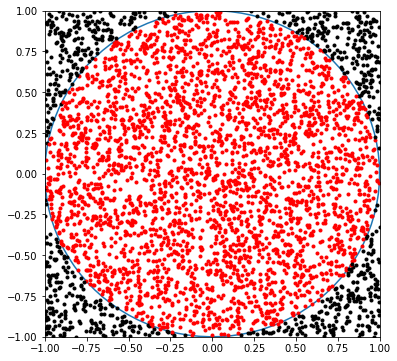

In [3]:
# direct-sampling

plt.figure(figsize=(6,6))
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))

N = 4000
x = np.random.random(N)*2-1
y = np.random.random(N)*2-1

for i in range(N):
    if x[i]*x[i] + y[i]*y[i] < 1 :
        plt.plot(x[i],y[i],'r.')
    else:
        plt.plot(x[i],y[i],'k.')

plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

## Markov-chain sampling

In [4]:
# Markov-pi
delta = 0.3
x_i, y_i = 1.0, 1.0

print('Markov-chain sampling\n')
print('δ={}, (x_i, y_i)=({}, {})'.format(delta, x_i, y_i))

print('{:3s} {:5s} {:10s} {:16s}'.format('Run', 'N_hit', 'Estimate of π', 'acceptance ratio'))

for run in range(5):
    x, y = x_i, y_i
    N_hit = 0
    N = 4000
    accept = 0
    for i in range(N):
        dx = delta*(np.random.random()*2-1)
        dy = delta*(np.random.random()*2-1)
        if np.abs(x+dx) < 1 and np.abs(y+dy) < 1 :
            accept = accept + 1
            x = x + dx
            y = y + dy
        else:
            x = x
            y = y
        if x*x + y*y < 1 :
            N_hit = N_hit + 1
    print("{:^3d} {:^5d} {:^10.3f} {:^16f}".format(run+1, N_hit, N_hit/(N/4), accept/N))


Markov-chain sampling

δ=0.3, (x_i, y_i)=(1.0, 1.0)
Run N_hit Estimate of π acceptance ratio
 1  3109    3.109        0.853500    
 2  3096    3.096        0.848500    
 3  3147    3.147        0.857250    
 4  3127    3.127        0.845250    
 5  3122    3.122        0.861500    


In [5]:
# Markov-pi
delta = 0.3
x_i, y_i = 1.0, 1.0

print('Markov-chain sampling\n')

for i in range(10):
    delta = (i+1)/10
    print('δ={}, (x_i, y_i)=({}, {})'.format(delta, x_i, y_i))
    print('{:3s},{:5s},{:10s},{:16s}'.format('Run', 'N_hit', 'Estimate of π', 'acceptance ratio'))

    for run in range(5):
        x, y = x_i, y_i
        N_hit = 0
        N = 4000
        accept = 0
        for i in range(N):
            dx = delta*(np.random.random()*2-1)
            dy = delta*(np.random.random()*2-1)
            if np.abs(x+dx) < 1 and np.abs(y+dy) < 1 :
                accept = accept + 1
                x = x + dx
                y = y + dy
            else:
                x = x
                y = y
            if x*x + y*y < 1 :
                N_hit = N_hit + 1
        print("{:^3d} {:^5d} {:^10.3f} {:^16f}".format(run+1, N_hit, N_hit/(N/4), accept/N))
    print()



Markov-chain sampling

δ=0.1, (x_i, y_i)=(1.0, 1.0)
Run,N_hit,Estimate of π,acceptance ratio
 1  3320    3.320        0.948250    
 2  3017    3.017        0.943750    
 3  3014    3.014        0.944000    
 4  3298    3.298        0.957750    
 5  2821    2.821        0.942000    

δ=0.2, (x_i, y_i)=(1.0, 1.0)
Run,N_hit,Estimate of π,acceptance ratio
 1  3098    3.098        0.906000    
 2  3037    3.037        0.904750    
 3  3238    3.238        0.901000    
 4  3042    3.042        0.878750    
 5  3207    3.207        0.914750    

δ=0.3, (x_i, y_i)=(1.0, 1.0)
Run,N_hit,Estimate of π,acceptance ratio
 1  3133    3.133        0.852750    
 2  3154    3.154        0.855250    
 3  3117    3.117        0.854250    
 4  3176    3.176        0.863000    
 5  3043    3.043        0.843750    

δ=0.4, (x_i, y_i)=(1.0, 1.0)
Run,N_hit,Estimate of π,acceptance ratio
 1  3144    3.144        0.808750    
 2  3125    3.125        0.809250    
 3  3065    3.065        0.811500    
 4  3177  

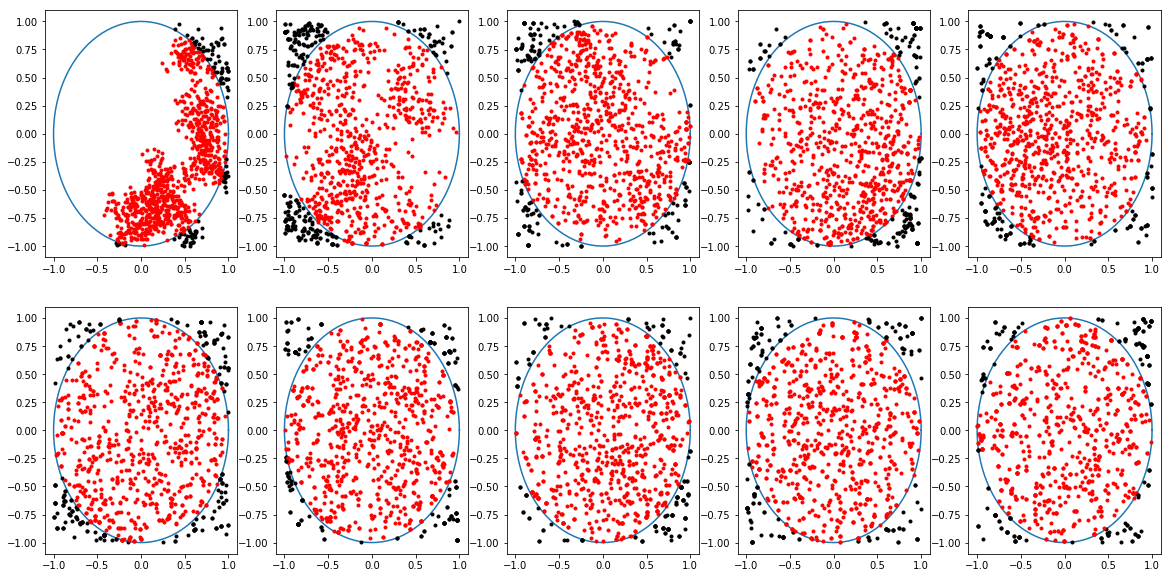

In [6]:
plt.figure(figsize=(20,10))
theta = np.linspace(0, 2*np.pi, 100)

x_i, y_i = 1.0, 1.0

for i in range(10):
    delta = (i+1)/10
#     print('δ={}, (x_i, y_i)=({}, {})'.format(delta, x_i, y_i))
#     print('{:3s},{:5s},{:10s},{:16s}'.format('Run', 'N_hit', 'Estimate of π', 'acceptance ratio'))

    plt.subplot(2,5,i+1)
    plt.plot(np.cos(theta), np.sin(theta))

    for run in range(1):
        x, y = x_i, y_i
        N_hit = 0
        N = 1000
        accept = 0
        for i in range(N):
            dx = delta*(np.random.random()*2-1)
            dy = delta*(np.random.random()*2-1)
            if np.abs(x+dx) < 1 and np.abs(y+dy) < 1 :
                accept = accept + 1
                x = x + dx
                y = y + dy
            else:
                x = x
                y = y
            if x*x + y*y < 1 :
                N_hit = N_hit + 1
                plt.plot(x,y,'r.')
            else:
                plt.plot(x,y,'k.')
#         print("{:^3d} {:^5d} {:^10.3f} {:^16f}".format(run+1, N_hit, N_hit/(N/4), accept/N))
    print()


    

δ=0.3, (x_i, y_i)=(1.0, 1.0)
Run N_hit Estimate of π acceptance ratio
 1  3085    3.085        0.856750    


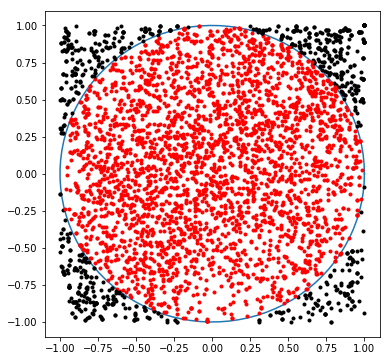

In [7]:
# Markov-chain sampling
plt.figure(figsize=(6,6))
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))

delta = 0.3
x, y = 1, 1
plt.plot(x,y,'k.')

print('δ={}, (x_i, y_i)=({}, {})'.format(delta, x_i, y_i))
print('{:3s} {:5s} {:10s} {:16s}'.format('Run', 'N_hit', 'Estimate of π', 'acceptance ratio'))

N_hit = 0
N = 4000
accept = 0
    
for i in range(N):
    dx = delta*(np.random.random()*2-1)
    dy = delta*(np.random.random()*2-1)
    if np.abs(x+dx) < 1 and np.abs(y+dy) < 1 :
        accept = accept + 1
        x = x + dx
        y = y + dy
    else:
        x = x
        y = y
    if x*x + y*y < 1 :
        N_hit = N_hit + 1
        plt.plot(x,y,'r.')
    else:
        plt.plot(x,y,'k.')        

print("{:^3d} {:^5d} {:^10.3f} {:^16f}".format(run+1, N_hit, N_hit/(N/4), accept/N)) 
plt.show()

### Buffon's needle problem

In [8]:
N = 4000
hit = 0

a = 1
b = 1

for i in range(N):
    xc = (b/2)*np.random.random()
    phi = (np.pi/2)*np.random.random()
    xtip = xc - (a/2)*np.cos(phi)
    if xtip < 0 :
        hit = hit + 1
        
print((a/b)*(2/np.pi), hit/N)

0.6366197723675814 0.6325


In [9]:
N = 4000
hit = 0

a = 1
b = 1

for i in range(N):
    xc = (b/2)*np.random.random()

    Gamma = 2
    while Gamma > 1:
        Dx = np.random.random()
        Dy = np.random.random()
        Gamma = np.sqrt(Dx*Dx+Dy*Dy)
        xtip = xc - (a/2)*Dx/Gamma
        
    if xtip < 0 :
        hit = hit + 1
        
print((a/b)*(2/np.pi), hit/N)

0.6366197723675814 0.64275
